In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

In [39]:
movies = pd.read_csv("movies.csv",encoding="Latin1")
ratings = pd.read_csv("ratings.csv")
df_r = ratings.copy()
df_m = movies.copy()

In [40]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
ratings.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [42]:
# Calculate mean rating for every userId and 'relative rating'
# 'relative rating' handles tough rater issue

Mean = ratings.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(ratings,Mean,on='userId')
Rating_avg['relative_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,relative_rating
0,12882,1,4.0,1147195252,4.061321,-0.061321
1,12882,32,3.5,1147195307,4.061321,-0.561321
2,12882,47,5.0,1147195343,4.061321,0.938679
3,12882,50,5.0,1147185499,4.061321,0.938679
4,12882,110,4.5,1147195239,4.061321,0.438679


In [43]:
# create user-item matrix

check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
check.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
userId,,,,,,,,,,,,,,,,,,,,,
316,2.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,4.5,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,2.5,3.0,4.5,4.0,NaN,NaN,3.0,4.5,3.5,3.0
910,5.0,4.0,3.5,NaN,3.5,3.5,NaN,NaN,NaN,4.0,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,4.5,NaN,NaN


## Find similarity between users

### 1st approach to calculate Pearson Correlation

In [44]:
final = pd.pivot_table(Rating_avg,values='relative_rating',index='userId',columns='movieId')
final.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
userId,,,,,,,,,,,,,,,,,,,,,
316,-0.829457,NaN,NaN,NaN,NaN,NaN,-1.329457,NaN,-0.829457,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,1.314526,NaN,NaN,NaN,NaN,1.314526,NaN,NaN,0.314526,0.314526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,0.705596,0.205596,NaN,NaN,NaN,1.205596,NaN,NaN,NaN,NaN,...,-1.294404,-0.794404,0.705596,0.205596,NaN,NaN,-0.794404,0.705596,-0.294404,-0.794404
910,1.101920,0.101920,-0.39808,NaN,-0.39808,-0.398080,NaN,NaN,NaN,0.101920,...,NaN,NaN,-0.398080,NaN,NaN,NaN,NaN,0.601920,NaN,NaN


In [45]:
# Replacing NaN by Movie Average. 
final_movie = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [46]:
final_movie.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
userId,,,,,,,,,,,,,,,,,,,,,
316,-0.829457,-0.436518,-0.468109,-0.770223,-0.615331,0.320415,-1.329457,-0.690175,-0.829457,-0.094277,...,0.105075,0.006629,0.262314,0.237350,0.429868,0.306567,0.225110,0.234458,0.362468,0.349157
320,0.200220,-0.436518,-0.468109,-0.770223,-0.615331,0.320415,-0.203889,-0.690175,-0.150642,-0.094277,...,0.105075,0.006629,0.262314,0.237350,0.429868,0.306567,0.225110,0.234458,0.362468,0.349157
359,1.314526,-0.436518,-0.468109,-0.770223,-0.615331,1.314526,-0.203889,-0.690175,0.314526,0.314526,...,0.105075,0.006629,0.262314,0.237350,0.429868,0.306567,0.225110,0.234458,0.362468,0.349157
370,0.705596,0.205596,-0.468109,-0.770223,-0.615331,1.205596,-0.203889,-0.690175,-0.150642,-0.094277,...,-1.294404,-0.794404,0.705596,0.205596,0.429868,0.306567,-0.794404,0.705596,-0.294404,-0.794404
910,1.101920,0.101920,-0.398080,-0.770223,-0.398080,-0.398080,-0.203889,-0.690175,-0.150642,0.101920,...,0.105075,0.006629,-0.398080,0.237350,0.429868,0.306567,0.225110,0.601920,0.362468,0.349157


In [47]:
final_user.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
userId,,,,,,,,,,,,,,,,,,,,,
316,-8.294574e-01,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,-1.329457e+00,1.893404e-16,-8.294574e-01,1.893404e-16,...,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16,1.893404e-16
320,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,...,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17,4.297638e-17
359,1.314526e+00,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,1.314526e+00,-1.135546e-16,-1.135546e-16,3.145258e-01,3.145258e-01,...,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16,-1.135546e-16
370,7.055961e-01,2.055961e-01,1.958963e-15,1.958963e-15,1.958963e-15,1.205596e+00,1.958963e-15,1.958963e-15,1.958963e-15,1.958963e-15,...,-1.294404e+00,-7.944039e-01,7.055961e-01,2.055961e-01,1.958963e-15,1.958963e-15,-7.944039e-01,7.055961e-01,-2.944039e-01,-7.944039e-01
910,1.101920e+00,1.019202e-01,-3.980798e-01,6.795811e-16,-3.980798e-01,-3.980798e-01,6.795811e-16,6.795811e-16,6.795811e-16,1.019202e-01,...,6.795811e-16,6.795811e-16,-3.980798e-01,6.795811e-16,6.795811e-16,6.795811e-16,6.795811e-16,6.019202e-01,6.795811e-16,6.795811e-16


In [48]:
# calculate Pearson Similarity between users(centered cosine similarity)

b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
userId,,,,,,,,,,,,,,,,,,,,,
316,0.000000,0.060063,0.072075,0.043266,0.039305,0.045616,0.035341,0.038068,-1.248514e-02,0.050183,...,0.052632,0.104864,0.011358,0.029674,0.092552,0.017876,0.051371,0.077377,0.026924,-0.022727
320,0.060063,0.000000,0.063054,0.027315,0.006811,0.075620,0.011910,0.042509,1.208166e-31,0.067389,...,0.115325,0.065130,0.071996,0.097554,0.064769,-0.006251,0.077256,0.098845,0.038752,0.056639
359,0.072075,0.063054,0.000000,0.135836,0.076131,0.036757,0.046418,0.066544,4.287659e-02,0.109726,...,0.120191,0.020672,0.032166,0.039599,0.108502,0.026371,0.075492,0.102698,0.099307,0.003147
370,0.043266,0.027315,0.135836,0.000000,0.108404,0.071655,0.070893,-0.003139,5.223516e-02,0.090241,...,0.091218,0.049594,0.004344,0.040692,0.110434,0.019767,-0.001364,0.052187,0.050997,0.009950
910,0.039305,0.006811,0.076131,0.108404,0.000000,0.021814,0.027339,-0.032211,-6.301121e-03,-0.007491,...,0.039464,-0.017620,0.020058,-0.004581,0.040866,-0.001438,-0.026082,0.073272,-0.012058,0.007610


In [49]:
# user similarity on replacing NAN by item(movie) avg
c = cosine_similarity(final_movie)
np.fill_diagonal(c, 0 )
similarity_with_movie = pd.DataFrame(c,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
userId,,,,,,,,,,,,,,,,,,,,,
316,0.000000,0.921169,0.665659,0.673486,0.694247,0.894969,0.805780,0.851492,0.945224,0.705491,...,0.827564,0.895641,0.879290,0.916856,0.912146,0.922262,0.587738,0.671783,0.949138,0.740220
320,0.921169,0.000000,0.687225,0.691158,0.699527,0.916020,0.816931,0.874283,0.970234,0.724147,...,0.861798,0.909376,0.907009,0.938964,0.929049,0.943265,0.612746,0.695382,0.973853,0.768459
359,0.665659,0.687225,0.000000,0.534369,0.523475,0.655225,0.602806,0.629143,0.705042,0.542504,...,0.621820,0.654320,0.655839,0.679696,0.683900,0.686193,0.418283,0.489595,0.707370,0.534065
370,0.673486,0.691158,0.534369,0.000000,0.547560,0.671810,0.618456,0.628825,0.712683,0.548592,...,0.636688,0.673489,0.651209,0.688647,0.689265,0.692595,0.405881,0.497332,0.714011,0.546637
910,0.694247,0.699527,0.523475,0.547560,0.000000,0.680701,0.621463,0.634921,0.723574,0.528281,...,0.638257,0.668887,0.677377,0.701964,0.701245,0.705041,0.408456,0.509008,0.725896,0.554105


### 2nd approach to calculate Pearson Correlation (same result)

In [50]:
# step1 create a pivot table with 'movieId' as columns, 'userId' as rows, 'ratings' as values
matrix_user = ratings.pivot_table(index = 'userId', columns = 'movieId', values = 'rating')

# step2 deal with missing value: in this case, I used row mean(mean rating of every user) to replace NA
matrix_user = matrix_user.apply(lambda row: row.fillna(row.mean()), axis=1)

# step3 transpose the matrix so that 'userId' is the columns (corr() function Compute pairwise correlation of columns, default method is 'Pearson' )
matrix_user = matrix_user.T.corr()
matrix_user.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
userId,,,,,,,,,,,,,,,,,,,,,
316,1.000000,0.060063,0.072075,0.043266,0.039305,0.045616,0.035341,0.038068,-1.248514e-02,0.050183,...,0.052632,0.104864,0.011358,0.029674,0.092552,0.017876,0.051371,0.077377,0.026924,-0.022727
320,0.060063,1.000000,0.063054,0.027315,0.006811,0.075620,0.011910,0.042509,-2.879394e-24,0.067389,...,0.115325,0.065130,0.071996,0.097554,0.064769,-0.006251,0.077256,0.098845,0.038752,0.056639
359,0.072075,0.063054,1.000000,0.135836,0.076131,0.036757,0.046418,0.066544,4.287659e-02,0.109726,...,0.120191,0.020672,0.032166,0.039599,0.108502,0.026371,0.075492,0.102698,0.099307,0.003147
370,0.043266,0.027315,0.135836,1.000000,0.108404,0.071655,0.070893,-0.003139,5.223516e-02,0.090241,...,0.091218,0.049594,0.004344,0.040692,0.110434,0.019767,-0.001364,0.052187,0.050997,0.009950
910,0.039305,0.006811,0.076131,0.108404,1.000000,0.021814,0.027339,-0.032211,-6.301121e-03,-0.007491,...,0.039464,-0.017620,0.020058,-0.004581,0.040866,-0.001438,-0.026082,0.073272,-0.012058,0.007610


In [51]:
# change the diagonal to 0 so that when we find_n_neighbors below, user/movie itself will not come to the first one
matrix_user.values[[np.arange(matrix_user.shape[0])]*2] = 0
matrix_user.head()

userId,316,320,359,370,910,975,1015,1387,1447,1588,...,137118,137209,137227,137446,137559,137609,137805,138072,138176,138200
userId,,,,,,,,,,,,,,,,,,,,,
316,0.000000,0.060063,0.072075,0.043266,0.039305,0.045616,0.035341,0.038068,-1.248514e-02,0.050183,...,0.052632,0.104864,0.011358,0.029674,0.092552,0.017876,0.051371,0.077377,0.026924,-0.022727
320,0.060063,0.000000,0.063054,0.027315,0.006811,0.075620,0.011910,0.042509,-2.879394e-24,0.067389,...,0.115325,0.065130,0.071996,0.097554,0.064769,-0.006251,0.077256,0.098845,0.038752,0.056639
359,0.072075,0.063054,0.000000,0.135836,0.076131,0.036757,0.046418,0.066544,4.287659e-02,0.109726,...,0.120191,0.020672,0.032166,0.039599,0.108502,0.026371,0.075492,0.102698,0.099307,0.003147
370,0.043266,0.027315,0.135836,0.000000,0.108404,0.071655,0.070893,-0.003139,5.223516e-02,0.090241,...,0.091218,0.049594,0.004344,0.040692,0.110434,0.019767,-0.001364,0.052187,0.050997,0.009950
910,0.039305,0.006811,0.076131,0.108404,0.000000,0.021814,0.027339,-0.032211,-6.301121e-03,-0.007491,...,0.039464,-0.017620,0.020058,-0.004581,0.040866,-0.001438,-0.026082,0.073272,-0.012058,0.007610


In [53]:
matrix_movie = ratings.pivot_table(index = 'userId', columns = 'movieId', values = 'rating')
matrix_movie = matrix_movie.fillna(matrix_movie.mean(axis=0))
matrix_movie = matrix_movie.corr()
matrix_movie.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.213859,0.141760,-0.008966,0.097387,0.142986,0.098391,-0.002693,0.249048,0.064682,...,0.091836,0.039616,0.000838,-6.202744e-02,0.014948,-0.023641,0.033899,0.118078,0.009632,0.027987
2,0.213859,1.000000,0.218855,0.038701,0.125331,0.088945,0.154515,0.087974,0.231964,0.045029,...,0.002335,0.070117,0.007135,2.042251e-02,0.025387,-0.008621,0.055854,0.100682,0.017698,-0.005051
3,0.141760,0.218855,1.000000,0.056912,0.194855,0.067841,0.215001,0.084497,0.238945,-0.042045,...,0.035813,0.000563,0.006274,-1.384687e-02,-0.067057,0.005918,0.035625,0.051791,0.004455,0.006536
4,-0.008966,0.038701,0.056912,1.000000,0.130774,0.014619,0.165135,0.008468,0.002328,0.054559,...,0.015719,-0.001914,-0.023196,2.517822e-27,-0.069161,0.022617,-0.004701,-0.004050,0.014739,0.003485
5,0.097387,0.125331,0.194855,0.130774,1.000000,0.014217,0.135021,0.033035,0.070476,0.295026,...,0.009895,0.006920,-0.016611,-7.851274e-02,-0.101702,-0.008514,0.020842,-0.030210,0.042158,-0.012994


In [54]:
matrix_movie.values[[np.arange(matrix_movie.shape[0])]*2] = 0
matrix_movie.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,106487,106489,106782,106920,109374,109487,111362,111759,112556,112852
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.213859,0.141760,-0.008966,0.097387,0.142986,0.098391,-0.002693,0.249048,0.064682,...,0.091836,0.039616,0.000838,-6.202744e-02,0.014948,-0.023641,0.033899,0.118078,0.009632,0.027987
2,0.213859,0.000000,0.218855,0.038701,0.125331,0.088945,0.154515,0.087974,0.231964,0.045029,...,0.002335,0.070117,0.007135,2.042251e-02,0.025387,-0.008621,0.055854,0.100682,0.017698,-0.005051
3,0.141760,0.218855,0.000000,0.056912,0.194855,0.067841,0.215001,0.084497,0.238945,-0.042045,...,0.035813,0.000563,0.006274,-1.384687e-02,-0.067057,0.005918,0.035625,0.051791,0.004455,0.006536
4,-0.008966,0.038701,0.056912,0.000000,0.130774,0.014619,0.165135,0.008468,0.002328,0.054559,...,0.015719,-0.001914,-0.023196,2.517822e-27,-0.069161,0.022617,-0.004701,-0.004050,0.014739,0.003485
5,0.097387,0.125331,0.194855,0.130774,0.000000,0.014217,0.135021,0.033035,0.070476,0.295026,...,0.009895,0.006920,-0.016611,-7.851274e-02,-0.101702,-0.008514,0.020842,-0.030210,0.042158,-0.012994


## Find neighbors

In [55]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index, index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [21]:
# x=np.array([2,4,5,3,-10,1])
# y=np.argsort(x)
# print(y)

[4 5 0 3 1 2]


In [56]:
# top 30 neighbours for each user
top30_sim_user = find_n_neighbours(matrix_user,30)
top30_sim_user.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
316,113673,117918,9050,12882,38187,102668,98880,43829,13215,78501,...,88608,120782,74472,53834,88928,42245,58265,89527,49830,63902
320,12288,113673,28159,79846,134627,112948,120729,97163,2945,4931,...,39271,94883,127683,101137,54989,134521,80946,10055,64365,106512
359,102118,96482,102532,50898,2702,60016,23428,120782,57937,42096,...,117258,7723,120729,61305,40768,117918,86768,129498,131620,58346
370,46645,42245,40768,23428,123707,60016,45120,113645,97195,102118,...,5611,20530,2702,38159,359,43354,117144,96482,2988,108195
910,87042,131620,67352,40768,31321,48821,26222,63295,5611,370,...,134521,88738,46645,108195,70201,58265,18115,114601,23428,17039


In [57]:
top30_sim_user_m = find_n_neighbours(similarity_with_movie,30)
top30_sim_user_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
316,138176,100240,96936,51460,88932,1447,104732,125012,5268,121403,...,121987,72633,21401,114335,22338,118304,124981,93203,81435,94333
320,138176,96936,121403,1447,51460,125012,88932,42944,5268,104529,...,121987,102549,118304,86309,94333,124981,93203,80585,136037,22338
359,138176,1447,5268,96936,100240,21401,88932,13927,104732,72633,...,12930,121987,114335,125012,51460,118304,57474,27142,80585,22338
370,86309,44194,138176,24802,129869,96936,1447,104529,94333,88932,...,124981,27142,102549,120308,54643,42944,80585,13927,21401,136037
910,96936,107991,138176,27142,51460,125012,88932,100240,72633,129869,...,36624,51255,94333,42944,121403,80585,61755,124981,88455,78908


In [58]:
def get_user_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.userId == user1].merge(
    Rating_avg[Rating_avg.userId == user2],
    on = "movieId",
    how = "inner" )
    return common_movies.merge( movies, on = 'movieId' )

In [59]:
a = get_user_movies(370,86309)
a = a.loc[ : , ['rating_x_x','rating_x_y','title']]
a.head()

,rating_x_x,rating_x_y,title
0,5.0,5.0,"Matrix, The (1999)"
1,5.0,4.5,"Lord of the Rings: The Fellowship of the Ring,..."
2,5.0,4.0,"Lord of the Rings: The Two Towers, The (2002)"
3,4.5,4.0,"Lord of the Rings: The Return of the King, The..."
4,1.5,1.0,Serenity (2005)


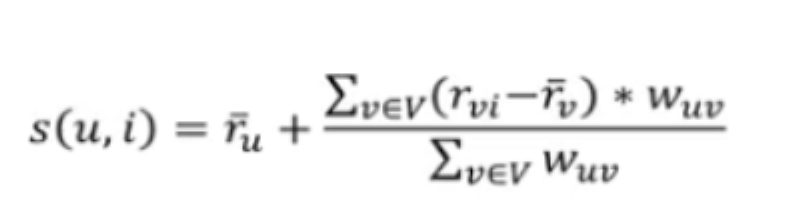

## Predict rating score based on user similarity

In [60]:
# Make the prediction according to fomular above
def rating_score_user_sim(user,item):
    a = top30_sim_user_m[top30_sim_user_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    
    # average rating a specific user gives
    avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
    
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_movie.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['relative_rating','correlation']
    
    # calculate '(rvi-rv)*wuv'
    fin['score']=fin.apply(lambda x:x['relative_rating'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    
    #calculate the formula above
    final_score = avg_user + (nume/deno)
    return final_score

In [61]:
rating_pred = rating_score_user_sim(320,7371)
print("s(u,i) is",rating_pred)

s(u,i) is 4.255766437391595


## Predict rating score based on item similarity

In [62]:
Rating_avg = Rating_avg.astype({'movieId': str})
Movie_user = Rating_avg.groupby(by='userId')['movieId'].apply(lambda x: ','.join(x))
Movie_user.head()

userId
316    1,7,10,32,34,150,160,163,165,185,196,223,253,2...
320    47,50,260,296,508,527,541,648,750,923,1136,119...
359    1,6,10,11,19,22,24,29,32,34,36,42,44,47,50,62,...
370    1,2,6,25,32,47,50,70,111,153,223,293,296,306,3...
910    1,2,3,5,6,11,15,16,25,32,34,52,62,95,100,110,1...
Name: movieId, dtype: object

In [63]:
# Make the prediction according to fomular above
def rating_score_item_sim(user):
    
    # show the movies this user have seen and given ratings
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    
    a = top30_sim_user_m[top30_sim_user_m.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    
    score = []
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = matrix_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['relative_rating','correlation']
        fin['score']=fin.apply(lambda x:x['relative_rating'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movieId')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

In [64]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_movies = rating_score_item_sim(user)
print(" ")
print("The Recommendations for User Id : 370")
print("   ")
for i in predicted_movies:
    print(i)

Enter the user id to whom you want to recommend : 370
 
The Recommendations for User Id : 370
   
Strictly Ballroom (1992)
Band of Brothers (2001)
Godfather: Part II, The (1974)
Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)
Pride and Prejudice (1995)
